In [1]:
import pandas as pd

# Baca dataset
data = pd.read_csv('/content/MLBB.csv')
# Pelabelan data
def label_sentiment(score):
    if score >3:
        return 'positif'
    else:
        return 'negatif'

data['sentiment'] = data['score'].apply(label_sentiment)

In [2]:
data.head(60)

,score,content,sentiment
0,1,"GAME AMPASS, LOSSTREK TIAP HARI GARA GARA TIM ...",negatif
1,1,Game tai,negatif
2,3,Mls komen 😪,negatif
3,1,Nge frame padahal di aplikasi yg lain enggak j...,negatif
4,1,Sistem matching nya ga adil gw dah mau mytich ...,negatif
5,1,Game taikkkkkkkkkkkkkkk,negatif
6,1,Ngasih tim yg bener dikit lh monton stres dape...,negatif
7,1,Game aneh gk pernah menang gua anj,negatif
8,1,Kurang enak main di kasi tim yang tolol Game b...,negatif
9,1,Main 1 hari aja kalah nya 5 kali,negatif


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   score      500 non-null    int64 
 1   content    500 non-null    object
 2   sentiment  500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [4]:
data.describe()

,score
count,500.000000
mean,2.274000
std,1.723039
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,5.000000


In [5]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
data.isnull().sum()

score        0
content      0
sentiment    0
dtype: int64

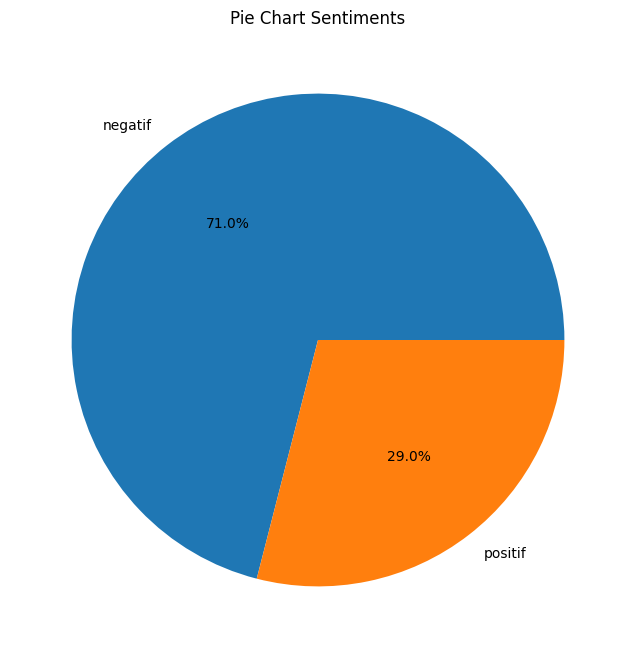

In [6]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart Sentiments')
plt.show()

##Preprocessing Data

Case Folding & Data Cleaning

In [7]:
import re
def clean_text(data, text_field, new_text_field_name):
    data[new_text_field_name] = data[text_field].str.lower()
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))
    # remove numbers
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"\d+", " ", elem))
    return data

In [8]:
data_clean = clean_text(data, 'content', 'text_clean')
data_clean.head(10)

,score,content,sentiment,text_clean
0,1,"GAME AMPASS, LOSSTREK TIAP HARI GARA GARA TIM ...",negatif,game ampass losstrek tiap hari gara gara tim ...
1,1,Game tai,negatif,game tai
2,3,Mls komen 😪,negatif,mls komen
3,1,Nge frame padahal di aplikasi yg lain enggak j...,negatif,nge frame padahal di aplikasi yg lain enggak j...
4,1,Sistem matching nya ga adil gw dah mau mytich ...,negatif,sistem matching nya ga adil gw dah mau mytich ...
5,1,Game taikkkkkkkkkkkkkkk,negatif,game taikkkkkkkkkkkkkkk
6,1,Ngasih tim yg bener dikit lh monton stres dape...,negatif,ngasih tim yg bener dikit lh monton stres dape...
7,1,Game aneh gk pernah menang gua anj,negatif,game aneh gk pernah menang gua anj
8,1,Kurang enak main di kasi tim yang tolol Game b...,negatif,kurang enak main di kasi tim yang tolol game b...
9,1,Main 1 hari aja kalah nya 5 kali,negatif,main hari aja kalah nya kali


Stopword Removal

In [9]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,score,content,sentiment,text_clean,text_StopWord
0,1,"GAME AMPASS, LOSSTREK TIAP HARI GARA GARA TIM ...",negatif,game ampass losstrek tiap hari gara gara tim ...,game ampass losstrek gara gara tim haram ngasi...
1,1,Game tai,negatif,game tai,game tai
2,3,Mls komen 😪,negatif,mls komen,mls komen
3,1,Nge frame padahal di aplikasi yg lain enggak j...,negatif,nge frame padahal di aplikasi yg lain enggak j...,nge frame aplikasi yg males maen mobile legends
4,1,Sistem matching nya ga adil gw dah mau mytich ...,negatif,sistem matching nya ga adil gw dah mau mytich ...,sistem matching nya ga adil gw dah mytich tim ...
5,1,Game taikkkkkkkkkkkkkkk,negatif,game taikkkkkkkkkkkkkkk,game taikkkkkkkkkkkkkkk
6,1,Ngasih tim yg bener dikit lh monton stres dape...,negatif,ngasih tim yg bener dikit lh monton stres dape...,ngasih tim yg bener dikit lh monton stres dape...
7,1,Game aneh gk pernah menang gua anj,negatif,game aneh gk pernah menang gua anj,game aneh gk menang gua anj
8,1,Kurang enak main di kasi tim yang tolol Game b...,negatif,kurang enak main di kasi tim yang tolol game b...,enak main kasi tim tolol game berat monton tol...
9,1,Main 1 hari aja kalah nya 5 kali,negatif,main hari aja kalah nya kali,main aja kalah nya kali


Tokenizing

In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,score,content,sentiment,text_clean,text_StopWord,text_tokens
0,1,"GAME AMPASS, LOSSTREK TIAP HARI GARA GARA TIM ...",negatif,game ampass losstrek tiap hari gara gara tim ...,game ampass losstrek gara gara tim haram ngasi...,"[game, ampass, losstrek, gara, gara, tim, hara..."
1,1,Game tai,negatif,game tai,game tai,"[game, tai]"
2,3,Mls komen 😪,negatif,mls komen,mls komen,"[mls, komen]"
3,1,Nge frame padahal di aplikasi yg lain enggak j...,negatif,nge frame padahal di aplikasi yg lain enggak j...,nge frame aplikasi yg males maen mobile legends,"[nge, frame, aplikasi, yg, males, maen, mobile..."
4,1,Sistem matching nya ga adil gw dah mau mytich ...,negatif,sistem matching nya ga adil gw dah mau mytich ...,sistem matching nya ga adil gw dah mytich tim ...,"[sistem, matching, nya, ga, adil, gw, dah, myt..."


Stemming

In [11]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

1407
------------------------
1 : game : game
2 : ampass : ampass
3 : losstrek : losstrek
4 : gara : gara
5 : tim : tim
6 : haram : haram
7 : ngasih : ngasih
8 : ga : ga
9 : sebanding : banding
10 : musuh : musuh
11 : otak : otak
12 : kasih : kasih
13 : draftsistem : draftsistem
14 : stress : stress
15 : dri : dri
16 : mitic : mitic
17 : honor : honor
18 : bintang : bintang
19 : turun : turun
20 : sampe : sampe
21 : mawi : mawi
22 : emang : emang
23 : kalo : kalo
24 : ampas : ampas
25 : smua : smua
26 : rusakkkk : rusakkkk
27 : pensi : pensi
28 : pensii : pensi
29 : bikin : bikin
30 : emosi : emosi
31 : tai : tai
32 : mls : mls
33 : komen : komen
34 : nge : nge
35 : frame : frame
36 : aplikasi : aplikasi
37 : yg : yg
38 : males : males
39 : maen : maen
40 : mobile : mobile
41 : legends : legends
42 : sistem : sistem
43 : matching : matching
44 : nya : nya
45 : adil : adil
46 : gw : gw
47 : dah : dah
48 : mytich : mytich
49 : dark : dark
50 : system : system
51 : mulu : mulu
52 : broken

,score,content,sentiment,text_clean,text_StopWord,text_tokens,text_steamindo
0,1,"GAME AMPASS, LOSSTREK TIAP HARI GARA GARA TIM ...",negatif,game ampass losstrek tiap hari gara gara tim ...,game ampass losstrek gara gara tim haram ngasi...,"[game, ampass, losstrek, gara, gara, tim, hara...",game ampass losstrek gara gara tim haram ngasi...
1,1,Game tai,negatif,game tai,game tai,"[game, tai]",game tai
2,3,Mls komen 😪,negatif,mls komen,mls komen,"[mls, komen]",mls komen
3,1,Nge frame padahal di aplikasi yg lain enggak j...,negatif,nge frame padahal di aplikasi yg lain enggak j...,nge frame aplikasi yg males maen mobile legends,"[nge, frame, aplikasi, yg, males, maen, mobile...",nge frame aplikasi yg males maen mobile legends
4,1,Sistem matching nya ga adil gw dah mau mytich ...,negatif,sistem matching nya ga adil gw dah mau mytich ...,sistem matching nya ga adil gw dah mytich tim ...,"[sistem, matching, nya, ga, adil, gw, dah, myt...",sistem matching nya ga adil gw dah mytich tim ...
5,1,Game taikkkkkkkkkkkkkkk,negatif,game taikkkkkkkkkkkkkkk,game taikkkkkkkkkkkkkkk,"[game, taikkkkkkkkkkkkkkk]",game taikkkkkkkkkkkkkkk
6,1,Ngasih tim yg bener dikit lh monton stres dape...,negatif,ngasih tim yg bener dikit lh monton stres dape...,ngasih tim yg bener dikit lh monton stres dape...,"[ngasih, tim, yg, bener, dikit, lh, monton, st...",ngasih tim yg bener dikit lh monton stres dape...
7,1,Game aneh gk pernah menang gua anj,negatif,game aneh gk pernah menang gua anj,game aneh gk menang gua anj,"[game, aneh, gk, menang, gua, anj]",game aneh gk menang gua anj
8,1,Kurang enak main di kasi tim yang tolol Game b...,negatif,kurang enak main di kasi tim yang tolol game b...,enak main kasi tim tolol game berat monton tol...,"[enak, main, kasi, tim, tolol, game, berat, mo...",enak main kasi tim tolol game berat monton tol...
9,1,Main 1 hari aja kalah nya 5 kali,negatif,main hari aja kalah nya kali,main aja kalah nya kali,"[main, aja, kalah, nya, kali]",main aja kalah nya kali


TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transformasikan data teks yang sudah dibersihkan
tfidf_matrix = tfidf_vectorizer.fit_transform(data_clean['text_steamindo'])
# Check the shape of the matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


Shape of TF-IDF matrix: (500, 1287)


Consine Similarity

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Contoh: Menghitung cosine similarity antara dokumen 0 dan 1
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Cosine Similarity antara dokumen 0 dan 1:", cos_sim)

Cosine Similarity antara dokumen 0 dan 1: [[0.02954219]]


Support Vector Machine (SVM)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Memisahkan fitur dan label
X = tfidf_matrix
y = data_clean['sentiment']
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Memprediksi data uji
y_pred = svm_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.8


##EVALUASI MODEL

K-Fold Cross Validation

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
# K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []
for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]
    svm_model.fit(X_train_k, y_train_k)
    y_pred_k = svm_model.predict(X_test_k)

    acc = accuracy_score(y_test_k, y_pred_k) * 100
    prec = precision_score(y_test_k, y_pred_k, average='weighted') * 100
    rec = recall_score(y_test_k, y_pred_k, average='weighted') * 100
    f1 = f1_score(y_test_k, y_pred_k, average='weighted') * 100
    results.append({
        'Fold': i+1,
        'Accuracy (%)': acc,
        'Precision (%)': prec,
        'Recall (%)': rec,
        'F1-Score (%)': f1,
        'Jumlah Data': len(y_test_k)
    })

# Menampilkan hasil cross validation dalam bentuk tabel
results_df = pd.DataFrame(results)
results_df

,Fold,Accuracy (%),Precision (%),Recall (%),F1-Score (%),Jumlah Data
0,1,78.0,76.930233,78.0,75.308017,50
1,2,84.0,86.909091,84.0,81.600000,50
2,3,76.0,74.071429,76.0,73.650350,50
3,4,84.0,86.909091,84.0,81.600000,50
4,5,84.0,83.600000,84.0,83.087719,50
5,6,78.0,79.090909,78.0,74.538879,50
6,7,84.0,84.715447,84.0,82.631579,50
7,8,80.0,79.674797,80.0,78.289474,50
8,9,80.0,81.063123,80.0,77.389277,50
9,10,84.0,86.976744,84.0,81.911422,50


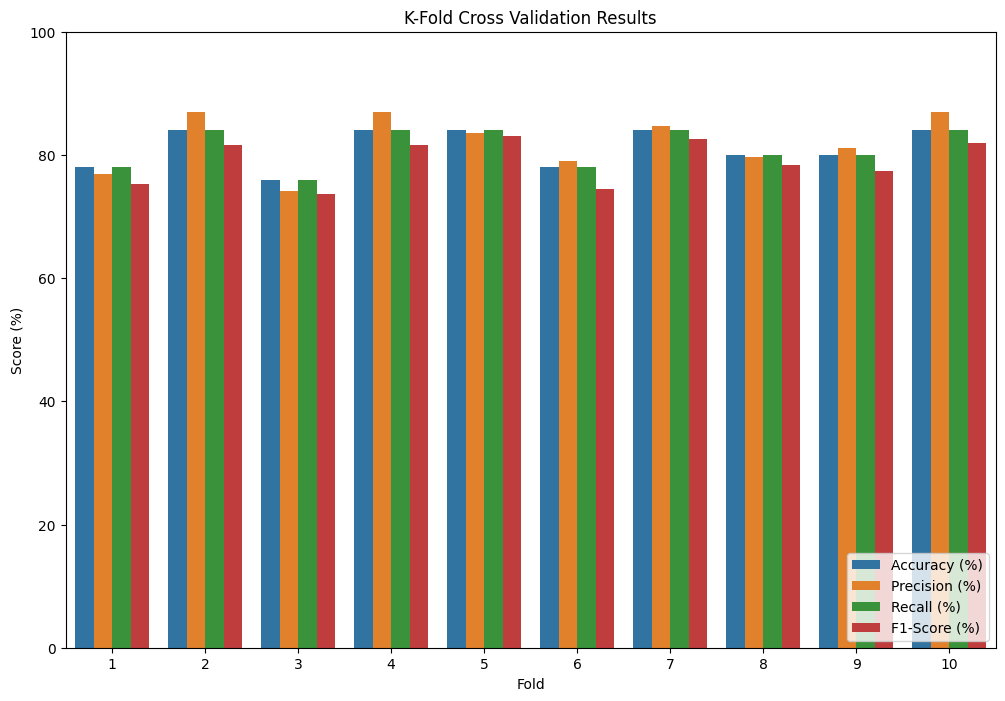

In [20]:
import seaborn as sns
# Plotting Cross Validation Results in Bar Chart
def plot_cross_val_results_bar(results_df):
    metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']
    results_melted = results_df.melt(id_vars='Fold', value_vars=metrics, var_name='Metric', value_name='Score')

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Fold', y='Score', hue='Metric', data=results_melted)
    plt.title('K-Fold Cross Validation Results')
    plt.xlabel('Fold')
    plt.ylabel('Score (%)')
    plt.ylim(0, 100)
    plt.legend(loc='lower right')
    plt.show()

plot_cross_val_results_bar(results_df)

Confusion Matrix

In [21]:
# Evaluasi model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[68  4]
 [16 12]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.81      0.94      0.87        72
     positif       0.75      0.43      0.55        28

    accuracy                           0.80       100
   macro avg       0.78      0.69      0.71       100
weighted avg       0.79      0.80      0.78       100



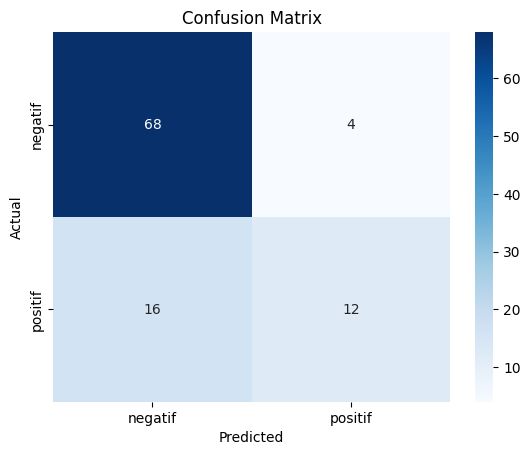

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the labels for the confusion matrix
labels = ['negatif','positif']

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud

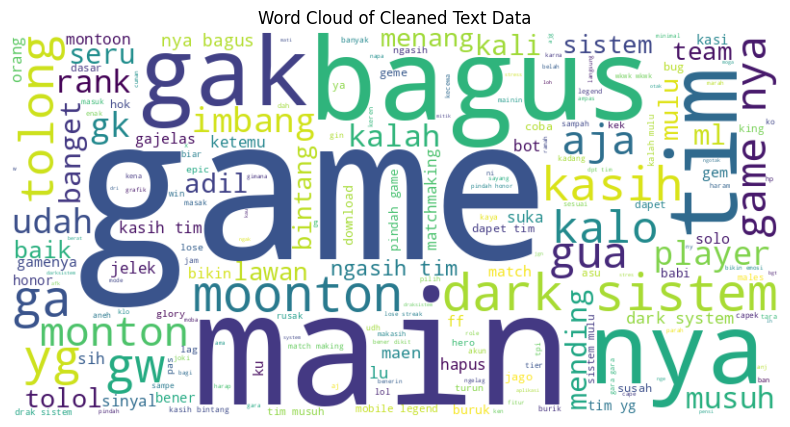

In [25]:
# Generate Word Cloud
text = ' '.join(data_clean['text_steamindo'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text Data')
plt.show()

In [26]:
# Function to preprocess input text
def preprocess_input_text(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = ' '.join([word for word in text.split() if word not in stop])
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmed_wrapper(term) for term in tokens]
    return ' '.join(stemmed_tokens)

# Function to predict sentiment
def predict_sentiment(text):
    preprocessed_text = preprocess_input_text(text)
    tfidf_text = tfidf_vectorizer.transform([preprocessed_text])
    prediction = svm_model.predict(tfidf_text)
    return prediction[0]

# Test the model with user input
user_input = input("Masukkan komentar: ")
prediction = predict_sentiment(user_input)
print("Prediksi Sentimen:", prediction)

Masukkan komentar: keren
Prediksi Sentimen: positif


EXPORT MODEL

In [27]:
import pickle

# Simpan model SVM
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

# Simpan TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Memindahkan file ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

!cp svm_model.pkl /content/drive/MyDrive/
!cp tfidf_vectorizer.pkl /content/drive/MyDrive/

Mounted at /content/drive
